In [2]:
import sklearn
import pandas as pd
import numpy as np
import numpy as np
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
x_train_all=pd.read_csv("x_train_all.csv")
x_test_all=pd.read_csv("x_test_all.csv")
y_train_all=pd.read_csv("y_train_all.csv")
y_test_all=pd.read_csv("y_test_all.csv")


In [4]:
x_train,x_test,y_train,y_test=train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=42)
svm=svm.SVC(kernel='linear')
svm.fit(x_train,y_train)

C:\Users\ajiks\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [8]:
# Predicting test data and finding accuracy scoresL 
y_pred_test = svm.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred_test))


Accuracy: 0.9401444788441693


In [15]:
#Training data
y_pred_train = svm.predict(x_train)
print("Accuracy:",accuracy_score(y_train, y_pred))


Accuracy: 1.0


In [9]:
#10 Fold Cross Validation: 
#Training
cross_val_train=cross_val_score(svm, x_train, y_train, cv=10, scoring="accuracy")
print("Cross Val Score for Training: ",cross_val_train)
mean_cv_train=mean(cross_val_train)
print("Mean: ",mean_cv_train)


C:\Users\ajiks\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajiks\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajiks\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ajiks\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Cross Val Score for Training:  [0.94458763 0.91752577 0.92       0.92645161 0.93677419 0.93806452
 0.93032258 0.9316129  0.93548387 0.93548387]


NameError: name 'mean' is not defined

In [47]:
#Testing
cross_val_test=cross_val_score(svm, x_test, y_test, cv=10, scoring="accuracy")
print("Cross Val Score for Training: ",cross_val_test)
mean_cv_test=mean(cross_val_test)
print("Mean: ",mean_cv_test)

Cross Val Score for Training:  [0.65463918 0.69072165 0.65463918 0.7371134  0.71134021 0.65463918
 0.67010309 0.68556701 0.62176166 0.59067358]
Mean:  0.667119811975856


In [16]:
#Precision score:
from sklearn.metrics import precision_score, recall_score

train_precision=precision_score(y_train, y_pred_train,average="weighted")
test_precision=precision_score(y_test, y_pred_test,average="weighted")
print("Precision Score for Training: ",train_precision)
print("Precision Score for Testing: ",test_precision)


Precision Score for Training:  1.0
Precision Score for Testing:  0.9413163361346245


In [17]:
#Recall score:
train_recall=recall_score(y_train,y_pred_train,average="weighted")
test_recall=recall_score(y_test,y_pred_test,average="weighted")
print("Recall Score for Training: ",train_recall)
print("Recall Score for Testing: ",test_recall)

Recall Score for Training:  1.0
Recall Score for Testing:  0.9401444788441693


In [18]:
#Confusion Matrix for Training and Testing
from sklearn.metrics import confusion_matrix
def conf_matrix_perf(actual,pred):
    conf_matrix = confusion_matrix(actual, pred)
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]
    tp = conf_matrix[1, 1]
    
    print("True Negative (TN):", tn)
    print("False Positive (FP):", fp)
    print("False Negative (FN):", fn)
    print("True Positive (TP):", tp) 
    
    fpr = fp / (tn + fp)
    fnr = fn / (fn + tp)
    tpr=tp/(tp+fn)
    tnr=tn/(tn+fp)

    print("True Positive Rate:", tpr)
    print("False Positive Rate:", fpr)
    print("True Negative :", tnr)
    print("False Negative:", fnr)

In [19]:
conf_matrix_perf(y_train,y_pred_train)

True Negative (TN): 164
False Positive (FP): 0
False Negative (FN): 0
True Positive (TP): 1769
True Positive Rate: 1.0
False Positive Rate: 0.0
True Negative : 1.0
False Negative: 0.0


In [20]:
conf_matrix_perf(y_test,y_pred_test)

True Negative (TN): 37
False Positive (FP): 8
False Negative (FN): 4
True Positive (TP): 428
True Positive Rate: 0.9907407407407407
False Positive Rate: 0.17777777777777778
True Negative : 0.8222222222222222
False Negative: 0.009259259259259259


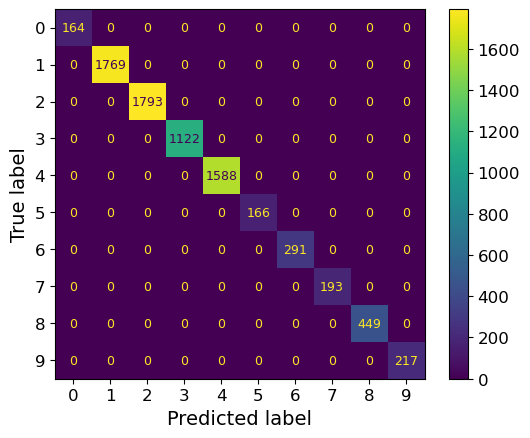

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Training Data:
plt.rc('font', size=9) 
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()


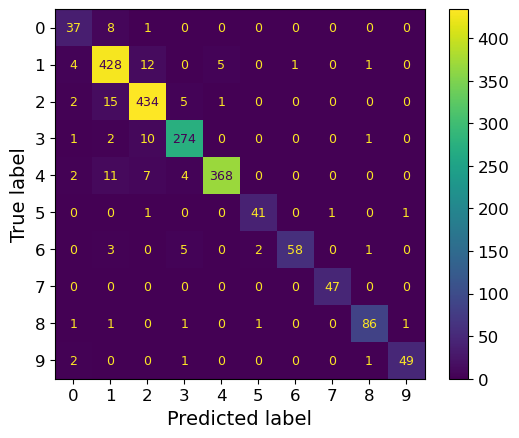

In [23]:
#Testing
plt.rc('font', size=9) 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()


In [10]:
y_test['0'].value_counts()

2    457
1    451
4    392
3    288
8     91
6     69
9     53
7     47
0     46
5     44
Name: 0, dtype: int64

In [29]:
#After PCA:
x_train_all

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,247.0,220.0,254.0,213.0,129.0,208.0,254.0,255.0,255.0,255.0,...,35.0,29.0,27.0,26.0,25.0,23.0,22.0,26.0,26.0,27.0
9686,151.0,118.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,252.0,...,37.0,31.0,30.0,30.0,30.0,30.0,29.0,26.0,28.0,27.0
9687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,41.0,49.0,42.0,36.0,33.0,36.0,39.0,31.0,39.0,43.0
9688,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,38.0,27.0,26.0,27.0,35.0,28.0,27.0,26.0,26.0,24.0


In [33]:
#PCA
pca=PCA(n_components=71)
x_train_pca=pca.fit_transform(x_train_all)
x_test_pca=pca.fit_transform(x_test_all)
Y=np.ravel(y_train_all)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_train_pca, Y, test_size=0.20, random_state=42)
svm.fit(x_train,y_train)

SVC(probability=True)

In [36]:
#Accuracy Score:
#Training:
y_pred_train=svm.predict(x_train)
accuracy_train=accuracy_score(y_train,y_pred_train)
print(f"Training Accuracy: {accuracy_train}")

Training Accuracy: 0.865454076367389


In [37]:
#Testing
y_pred_test=svm.predict(x_test)
accuracy_test=accuracy_score(y_test,y_pred_test)
print(f"Testing Accuracy: {accuracy_test}")

Testing Accuracy: 0.8333333333333334


In [38]:
#10 fold cross validation
#Training
cross_val_train=cross_val_score(svm, x_train, y_train, cv=10, scoring="accuracy")
print("Cross Val Score for Training: ",cross_val_train)
mean_cv_train=mean(cross_val_train)
print("Mean: ",mean_cv_train)

Cross Val Score for Training:  [0.81443299 0.82603093 0.82064516 0.84387097 0.83741935 0.85290323
 0.81806452 0.83612903 0.81032258 0.82451613]
Mean:  0.8284334885267709


In [39]:
#Testing
cross_val_test=cross_val_score(svm, x_test, y_test, cv=10, scoring="accuracy")
print("Cross Val Score for Testing: ",cross_val_test)
mean_cv_test=mean(cross_val_test)
print("Mean: ",mean_cv_test)


Cross Val Score for Testing:  [0.65463918 0.69072165 0.65463918 0.7371134  0.71134021 0.65463918
 0.67010309 0.68556701 0.62176166 0.59067358]
Mean:  0.667119811975856


In [40]:
#Precision score:
from sklearn.metrics import precision_score, recall_score

train_precision=precision_score(y_train, y_pred_train,average="weighted")
test_precision=precision_score(y_test, y_pred_test,average="weighted")
print("Precision Score for Training: ",train_precision)
print("Precision Score for Testing: ",test_precision)


Precision Score for Training:  0.8694198471946704
Precision Score for Testing:  0.8385203739118917


In [41]:
#Recall score:
train_recall=recall_score(y_train,y_pred_train,average="weighted")
test_recall=recall_score(y_test,y_pred_test,average="weighted")
print("Recall Score for Training: ",train_recall)
print("Recall Score for Testing: ",test_recall)

Recall Score for Training:  0.865454076367389
Recall Score for Testing:  0.8333333333333334


In [42]:
#Confusion Matrix for Training and Testing
from sklearn.metrics import confusion_matrix
def conf_matrix_perf(actual,pred):
    conf_matrix = confusion_matrix(actual, pred)
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]
    tp = conf_matrix[1, 1]
    
    print("True Negative (TN):", tn)
    print("False Positive (FP):", fp)
    print("False Negative (FN):", fn)
    print("True Positive (TP):", tp) 
    
    fpr = fp / (tn + fp)
    fnr = fn / (fn + tp)
    tpr=tp/(tp+fn)
    tnr=tn/(tn+fp)

    print("True Positive Rate:", tpr)
    print("False Positive Rate:", fpr)
    print("True Negative :", tnr)
    print("False Negative:", fnr)

In [43]:
conf_matrix_perf(y_train,y_pred_train)

True Negative (TN): 114
False Positive (FP): 46
False Negative (FN): 0
True Positive (TP): 1611
True Positive Rate: 1.0
False Positive Rate: 0.2875
True Negative : 0.7125
False Negative: 0.0


In [44]:
conf_matrix_perf(y_test,y_pred_test)

True Negative (TN): 39
False Positive (FP): 7
False Negative (FN): 0
True Positive (TP): 394
True Positive Rate: 1.0
False Positive Rate: 0.15217391304347827
True Negative : 0.8478260869565217
False Negative: 0.0


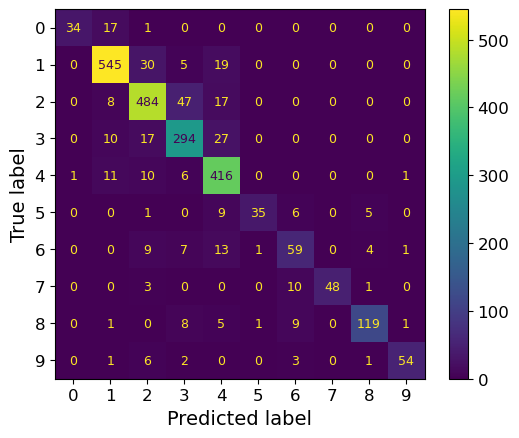

In [45]:
#Training Data:
y_train_flat = y_train.flatten()[:2423] 
y_pred_train_flat = y_pred_train.flatten()[:2423] 
plt.rc('font', size=9) 
ConfusionMatrixDisplay.from_predictions(y_train_flat, y_pred_train_flat)
plt.show()

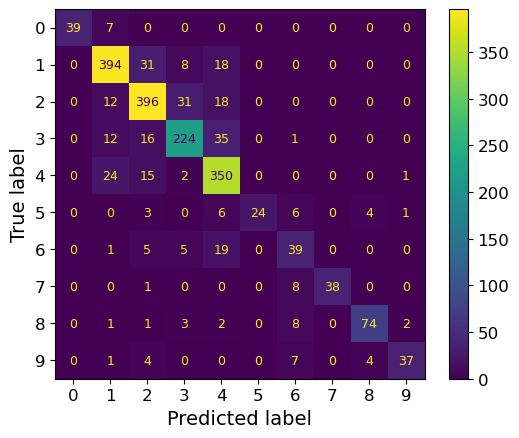

In [46]:
#Testing Data:
y_test_flat = y_test.flatten()[:2423] 
y_pred_test_flat = y_pred_test.flatten()[:2423] 
ConfusionMatrixDisplay.from_predictions(y_test_flat, y_pred_test_flat)
plt.show()

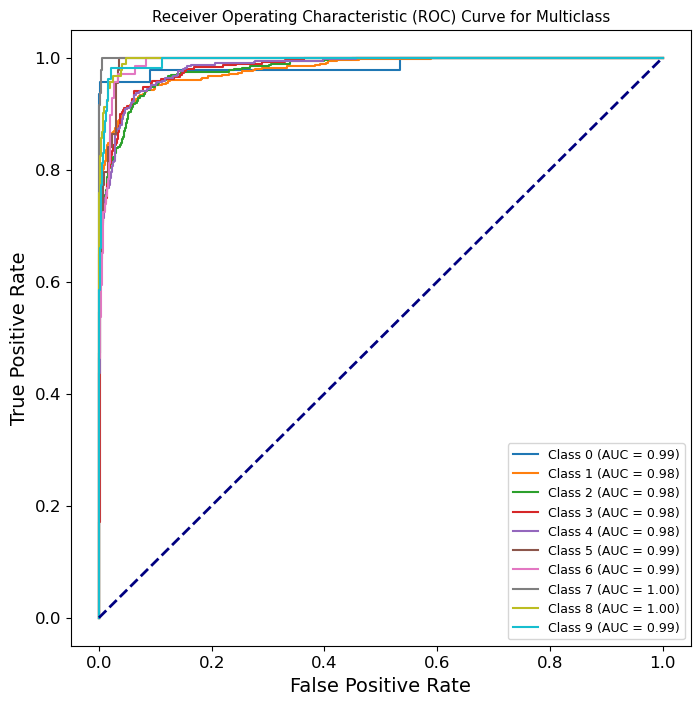

In [48]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(x_train, y_train)
y_pred_proba = svm.predict_proba(x_test)
y_test_bin = label_binarize(y_test, classes=svm.classes_)

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(svm.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()